In [1]:
#1- Modificar el algoritmo de quicksort recursivo para que cuando el problema de entrada sea de menor o 
# igual tamaño que un límite constante "c" que se recibe como parámetro del programa, se utilice el 
# algoritmo de inserción directa en lugar de seguir haciendo recursión con quicksort.
#2- Probar con diferentes tamaños de vector y límite, hasta encontrar el valor óptimo de "c" 
# (o cercano al óptimo) en el que el tiempo de ejecución es menor.


In [6]:
import math;
import time;
import random;

from math import dist;
import matplotlib.pyplot as plt;
import numpy as np;



In [7]:
#ALGORITMO DE INSERCION DIRECTA
def insercion(A, ref): 
    i = 1
    while i < len(A):
        
        x = A[i]
        j = i - 1
        while j>= 0 and dist(A[j],ref)>dist(x,ref):
            A[j+1] = A[j]
            j = j - 1
        A[j+1] = x
        i = i + 1
    


In [96]:
#ESQUEMA DE PARTICION DE LOMUTO
#Escogemos un pivote y lo ubico en su posicion correspondiente
#de un segmento
    #ref: punto referencia desde el que se toman las distancias
    #A: lista a ordenar

def partition(A, lo, hi, ref):
    pivot = A[hi]
    i = lo 
    
    for j in range(lo,hi):
        if dist(A[j],ref) < dist(pivot,ref):
            
            A[i], A[j] = A[j], A[i]
            i = i+1
     
    A[i], A[hi] =A[hi], A[i]
    
    return i

In [86]:
#ALGORITMO QUICKSORT MODIFICADO CON INSERCION DIRECTA

def quicksort(A, lo, hi,ref, c):
    
    if lo >= hi or lo < 0: #Fin de la ordenacion
        return
    if(len(A)<=c): #El problema de entrada es de menor o igual tamaño que c
        insercion(A,ref)
        return
    
    
    
    p = partition(A, lo, hi,ref)
    
    #Ordenar las dos particiones
    quicksort(A, lo, p-1,ref,c)
    quicksort(A, p+1, hi,ref,c)
    


In [130]:
#ALGORITMO DE QUICKSORT ORIGINAL
def quicksortOriginal(A, lo, hi,ref):
    
    if lo >= hi or lo < 0: 
        return

    p = partition(A, lo, hi,ref)
    
    #Ordenar las dos particiones
    quicksortOriginal(A, lo, p-1,ref)
    quicksortOriginal(A, p+1, hi,ref)
    

In [99]:
#Generar un vector de tamaño aleatorio n=100 con puntos (x,y) aleatorios:
def generarVector(n):
    A=[]
    
    #n = 100000
    for i in range(0,n-1):
        x = random.randint(0,30)
        y = random.randint(0,30)
        A.append((x,y))
    return A
    


In [114]:
def funcion(n):
    ref=(0,0)
    A = generarVector(n) #Genera un vector aleatorio de tamaño n
    
    ts =[]
    cs =[]
    for c in range(10,n,10):
        cs.append(c)
        ppo = time.time() #devuelve el tiempo en segundos
        quicksort(A, 0 , len(A)-1, ref,c)
        
        fin = time.time()
        tiempo = fin-ppo
        ts.append(tiempo)
   
    plt.plot(cs, ts)
    
            
        

        


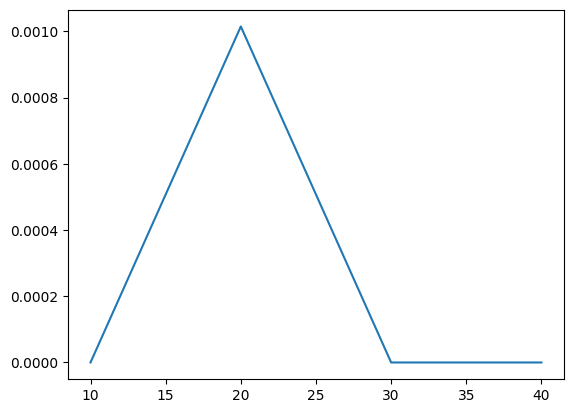

In [115]:
funcion(50)

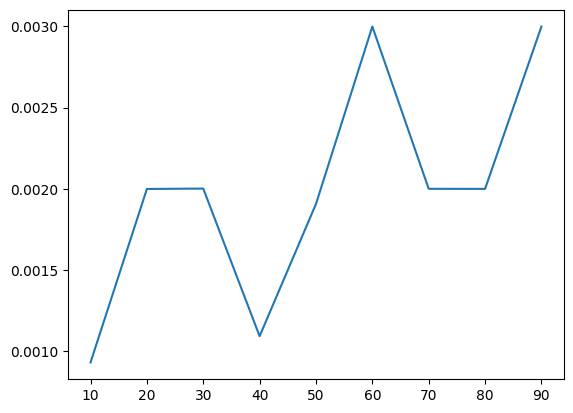

In [118]:
funcion(100)

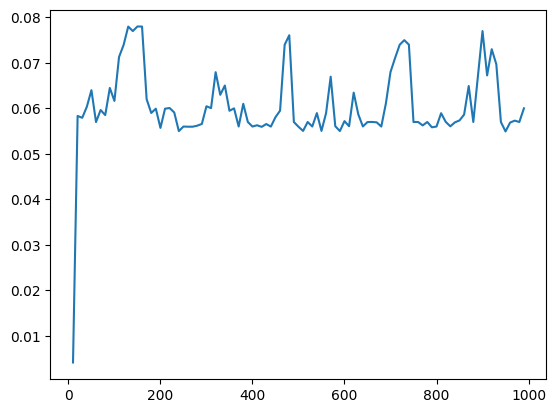

In [121]:
funcion(1000)

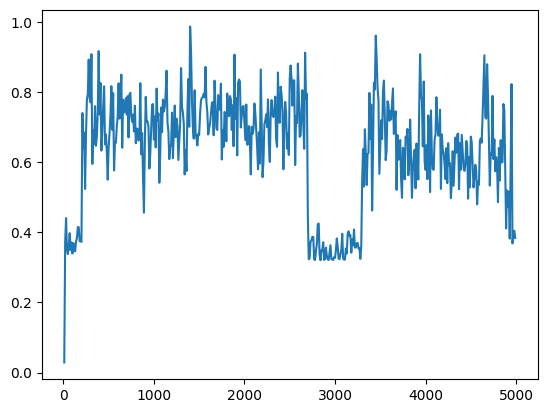

In [122]:
funcion(5000)

In [139]:
#Comparacion entre Quicksort original y Quicksort con Inserción Directa
#n: tamaño maximo del vector
#k: saltos de los tamaños del vector
def ejecucionQSQSID(n,k): 

    ref =(0,0) #Punto de referencia

    tiemposQSID=[]
    tiemposQS=[]

    for i in range(0,n,k):
        A= generarVector(i)
        B = A.copy()
        C = A.copy()
        inicioQS = time.time()
        quicksortOriginal(C, 0 , len(C)-1,ref)
        finQS = time.time()
        tiemposQS.append((finQS-inicioQS)*1000)
        
    
        
        inicioID = time.time()
        quicksort(B,0, len(B)-1, ref, 0.6*i)
        finID = time.time()
        tiemposQSID.append((finID-inicioID)*1000)

    i = range(0,n,k)
    plt.plot(i, tiemposQS, i,tiemposQSID)

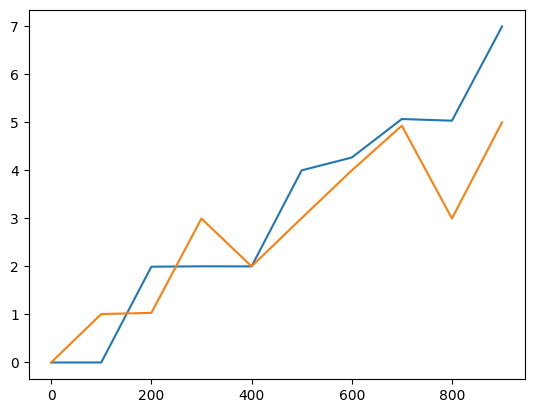

In [140]:
ejecucionQSQSID(1000,100)

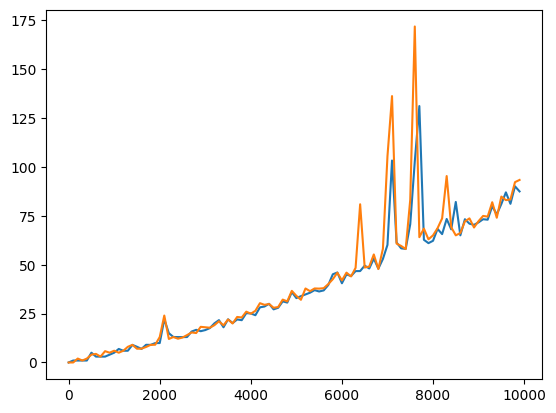

In [141]:
ejecucionQSQSID(10000,100)

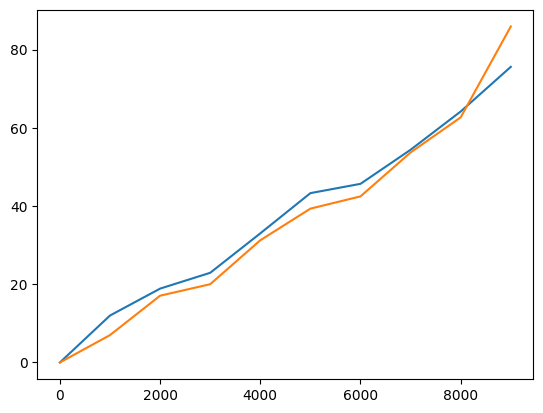

In [142]:
ejecucionQSQSID(10000,1000)

In [135]:
#Comparacion entre Quicksort original e Inserción Directa
#n: tamaño maximo del vector
#k: saltos de los tamaños del vector
def ejecucionQSID(n,k): 

    ref =(0,0) #Punto de referencia

    tiemposID=[]
    tiemposQS=[]

    for i in range(0,n,k):
        A= generarVector(i)
        B = A.copy()
        C = A.copy()
        inicioQS = time.time()
        quicksortOriginal(C, 0 , len(C)-1,ref)
        finQS = time.time()
        tiemposQS.append((finQS-inicioQS)*1000)
        
    
        
        inicioID = time.time()
        insercion(B,ref)
        finID = time.time()
        tiemposID.append((finID-inicioID)*1000)

    i = range(0,n,k)
    plt.plot(i, tiemposQS, i,tiemposID)

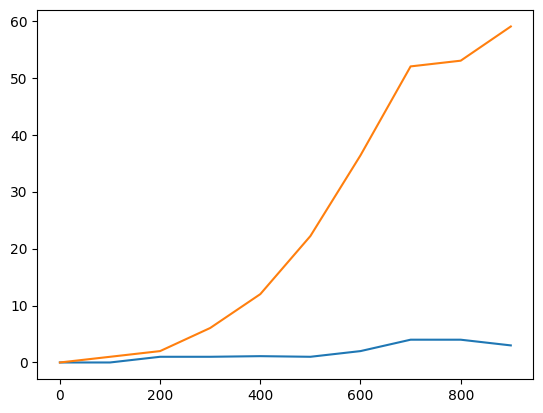

In [136]:
ejecucionQSID(1000,100)